In [2]:
import torch
import dgl
import graphgallery 
import matplotlib.pyplot as plt

Using backend: pytorch


In [3]:
torch.__version__, dgl.__version__

('1.6.0+cu101', '0.5.2')

In [4]:
graphgallery.__version__

'0.5.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [5]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split()


In [6]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [7]:
graphgallery.set_backend("dgl")

DGL PyTorch 0.5.2 (PyTorch 1.6.0+cu101) Backend

In [8]:
from graphgallery.nn.gallery import GCN
model = GCN(graph, attr_transform="normalize_attr", device='GPU', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=200)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


Training...
100/100 [==============================] - 1s 7ms/step - loss: 0.5388 - acc: 0.9786 - val_loss: 1.0077 - val_acc: 0.8160 - time: 0.7405
Testing...
1/1 [==============================] - 0s 3ms/step - test_loss: 0.9782 - test_acc: 0.8230 - time: 0.0030
Test loss 0.97817, Test accuracy 82.30%


## Visualization Training 

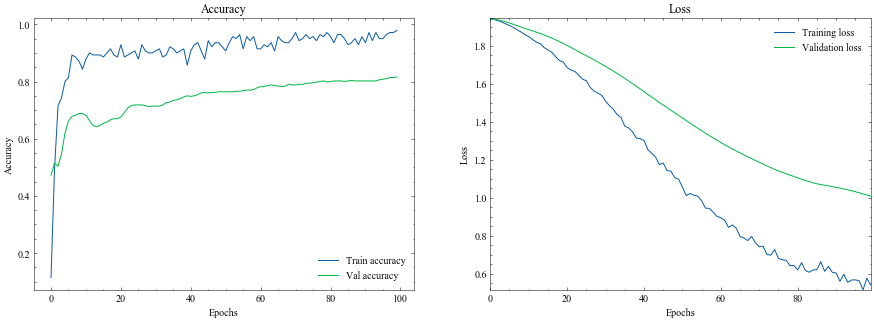

In [9]:
import matplotlib.pyplot as plt
with plt.style.context(['science', 'no-latex']):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(his.history['acc'], label='Train accuracy')
    axes[0].plot(his.history['val_acc'], label='Val accuracy')
    axes[0].legend()
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')


    axes[1].plot(his.history['loss'], label='Training loss')
    axes[1].plot(his.history['val_loss'], label='Validation loss')
    axes[1].legend()
    axes[1].set_title('Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    
    plt.autoscale(tight=True)
    plt.show()    